#데이터 다운로드

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
!cp /content/gdrive/MyDrive/temp/flowers_prepared.zip ./

In [16]:
!unzip flowers_prepared.zip

Archive:  flowers_prepared.zip
replace flowers_prepared/test/daisy/401.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers_prepared/test/daisy/401.jpg  
  inflating: flowers_prepared/test/daisy/402.jpg  
  inflating: flowers_prepared/test/daisy/403.jpg  
  inflating: flowers_prepared/test/daisy/404.jpg  
  inflating: flowers_prepared/test/daisy/405.jpg  
  inflating: flowers_prepared/test/daisy/406.jpg  
  inflating: flowers_prepared/test/daisy/407.jpg  
  inflating: flowers_prepared/test/daisy/408.jpg  
  inflating: flowers_prepared/test/daisy/409.jpg  
  inflating: flowers_prepared/test/daisy/410.jpg  
  inflating: flowers_prepared/test/daisy/411.jpg  
  inflating: flowers_prepared/test/daisy/412.jpg  
  inflating: flowers_prepared/test/daisy/413.jpg  
  inflating: flowers_prepared/test/daisy/414.jpg  
  inflating: flowers_prepared/test/daisy/415.jpg  
  inflating: flowers_prepared/test/daisy/416.jpg  
  inflating: flowers_prepared/test/daisy/417.jpg  
  inflating: flow

##학습

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_7 (Flatten)         (None, 68992)             0         
                                                                 
 dense_17 (Dense)            (None, 256)               17662208  
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 25,433,086
Trainable params: 17,664,005
Non-trainable params: 7,769,081
__________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


32/32 [==============================] - 32s 778ms/step - loss: 0.7660 - acc: 0.7725 - val_loss: 0.7193 - val_acc: 0.8483
Epoch 2/10
32/32 [==============================] - 23s 715ms/step - loss: 0.3114 - acc: 0.8945 - val_loss: 0.5357 - val_acc: 0.8720
Epoch 3/10
32/32 [==============================] - 23s 718ms/step - loss: 0.2305 - acc: 0.9165 - val_loss: 0.3478 - val_acc: 0.9052
Epoch 4/10
32/32 [==============================] - 23s 712ms/step - loss: 0.1471 - acc: 0.9480 - val_loss: 0.3966 - val_acc: 0.8910
Epoch 5/10
32/32 [==============================] - 23s 713ms/step - loss: 0.1306 - acc: 0.9550 - val_loss: 0.4909 - val_acc: 0.8863
Epoch 6/10
32/32 [==============================] - 22s 694ms/step - loss: 0.0932 - acc: 0.9665 - val_loss: 0.4152 - val_acc: 0.9147
Epoch 7/10
32/32 [==============================] - 22s 696ms/step - loss: 0.0848 - acc: 0.9725 - val_loss: 0.4691 - val_acc: 0.8768
Epoch 8/10
32/32 [==============================] - 23s 716ms/step - loss: 0.076

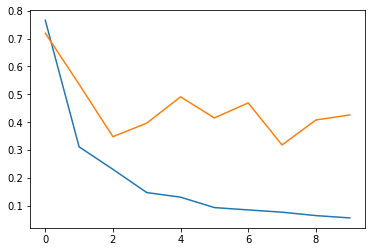

4/4 [==============================] - 1s 119ms/step - loss: 0.4257 - acc: 0.8768
loss= 0.425712913274765
acc= 0.8767772316932678


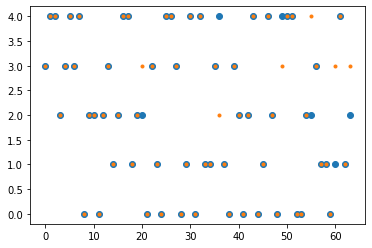

label category index = 3.0
predicted category index = 3
predicted category name = sunflower


In [35]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "flowers_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "flowers_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10,
      callbacks=[model_check_point]
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


##Callback

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [37]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [41]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



#모델 저장 - ModelCheckpoint

In [40]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
#model.fit(train_x, train_y, epochs=300, verbose=0, batch_size=20, validation_split=0.1, 
          #callbacks=[model_check_point])

